In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [25]:
df = pd.read_csv("TechElectro_Customer_Data.csv")

In [26]:
df.head()

,CustomaleerID,Age,Gender,MaritalStatus,AnnualIncome (USD),TotalPurchases,PreferredCategory
0,1001,58,male,Divorced,73598,53,Appliances
1,1002,32,male,Married,31717,87,Appliances
2,1003,55,Female,Divorced,26952,29,Appliances
3,1004,32,male,Married,38031,87,Electronics
4,1005,32,Female,Married,43231,18,Appliances


In [27]:
df.isnull().sum()

CustomaleerID         0
Age                   0
Gender                0
MaritalStatus         0
AnnualIncome (USD)    0
TotalPurchases        0
PreferredCategory     0
dtype: int64

In [28]:
numerical_cols = ['Age', 'AnnualIncome (USD)', 'TotalPurchases']
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

df[numerical_cols] = minmax_scaler.fit_transform(df[numerical_cols])


In [29]:
df.head()


,CustomaleerID,Age,Gender,MaritalStatus,AnnualIncome (USD),TotalPurchases,PreferredCategory
0,1001,0.851064,male,Divorced,0.745837,0.525641,Appliances
1,1002,0.297872,male,Married,0.096459,0.961538,Appliances
2,1003,0.787234,Female,Divorced,0.022576,0.217949,Appliances
3,1004,0.297872,male,Married,0.194359,0.961538,Electronics
4,1005,0.297872,Female,Married,0.274987,0.076923,Appliances


#  Encoding Categorical Variables:

In [32]:
categorical_col = 'PreferredCategory'
df_encoded = pd.get_dummies(df, columns=[categorical_col], drop_first=True)





In [33]:
df_encoded.head()

,CustomaleerID,Age,Gender,MaritalStatus,AnnualIncome (USD),TotalPurchases,PreferredCategory_Electronics
0,1001,0.851064,male,Divorced,0.745837,0.525641,0
1,1002,0.297872,male,Married,0.096459,0.961538,0
2,1003,0.787234,Female,Divorced,0.022576,0.217949,0
3,1004,0.297872,male,Married,0.194359,0.961538,1
4,1005,0.297872,Female,Married,0.274987,0.076923,0


# Correlation heatmap

C:\Users\Qurrat\AppData\Local\Temp\ipykernel_14748\2298098936.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


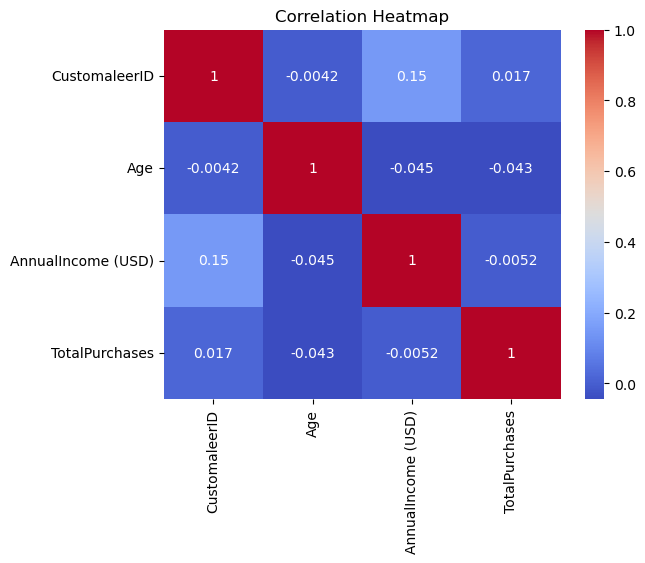

In [34]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#  Box plot for annual income by preferred category


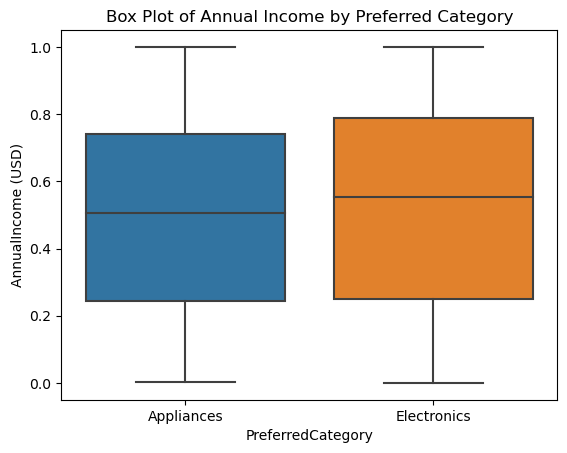

In [35]:
sns.boxplot(data=df, x='PreferredCategory', y='AnnualIncome (USD)')
plt.title('Box Plot of Annual Income by Preferred Category')
plt.show()

# Bar plot for marital status distribution

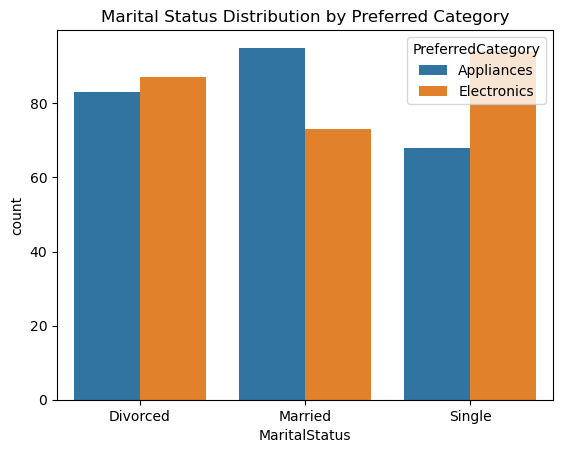

In [36]:
sns.countplot(data=df, x='MaritalStatus', hue='PreferredCategory')
plt.title('Marital Status Distribution by Preferred Category')
plt.show()

In [48]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
columns_for_clustering = ['Age', 'AnnualIncome (USD)', 'TotalPurchases', 'PreferredCategory_Electronics']
scaler = StandardScaler()






In [49]:
df_scaled = scaler.fit_transform(df_encoded[columns_for_clustering])
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df_encoded['Cluster'] = kmeans.fit_predict(df_scaled)
cluster_sizes = df_encoded['Cluster'].value_counts()
print("Cluster Sizes:", cluster_sizes)

C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Cluster Sizes: 2    246
0    131
1    123
Name: Cluster, dtype: int64


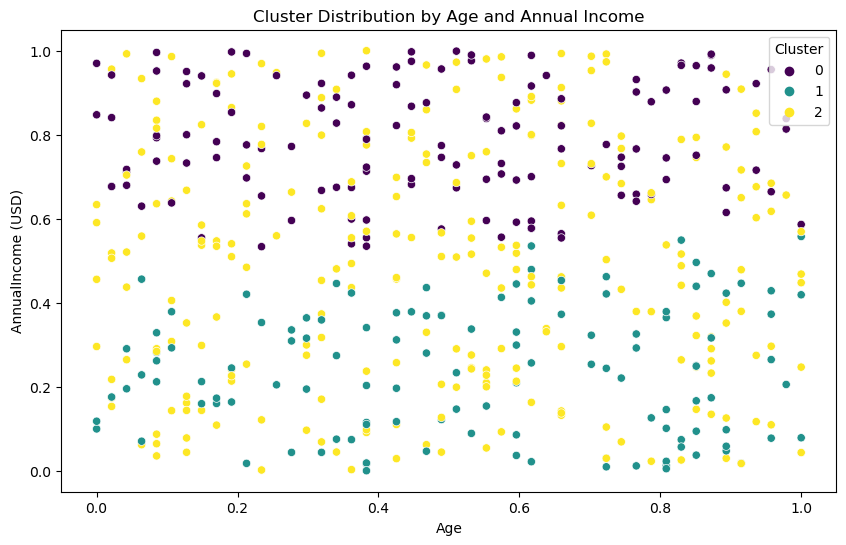

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_encoded, x='Age', y='AnnualIncome (USD)', hue='Cluster', palette='viridis')
plt.title('Cluster Distribution by Age and Annual Income')
plt.show()

